In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [150]:
df = pd.read_csv("cubic_zirconia.csv")
df.drop(['Unnamed: 0'],axis = 1,inplace =True)



In [151]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [152]:
df.shape

(26967, 10)

In [153]:

df.describe()

,carat,depth,table,x,y,z,price
count,26967.000000,26270.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000
mean,0.798375,61.745147,57.456080,5.729854,5.733569,3.538057,3939.518115
std,0.477745,1.412860,2.232068,1.128516,1.166058,0.720624,4024.864666
min,0.200000,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.000000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,0.700000,61.800000,57.000000,5.690000,5.710000,3.520000,2375.000000
75%,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000,5360.000000
max,4.500000,73.600000,79.000000,10.230000,58.900000,31.800000,18818.000000


# Data pre processing


### First Dealing with null values
 

In [154]:
df.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

So only depth has null values, so we just need to handle null values for depth

As we saw in describe that our std is 1 and max percentage has same value so for dealing with NA we will be just filling them with mean values

In [155]:
df.fillna(value = df['depth'].mean(),inplace=True)

## Now Dealing with Outliers
As we saw that by using describe that some diamonds has 0 x,y,z,
which can't be true so we will be finding these outliers and removing them.

We are using IQR technique for removing the outlier (by changing the 1.5 to 1.7 in IQR formula)
to remove only specific data

In [171]:
Q1 = df.x.quantile(0.25)
Q3 = df.x.quantile(0.75)
IQR=Q3-Q1

lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR

lower_limit,upper_limit

(1.9500000000000002, 9.309999999999999)

In [172]:
df1 = df[(df.x>lower_limit)&(df.x<upper_limit)]
df1.describe()

,carat,cut,color,clarity,depth,table,x,y,z,price
count,26952.000000,26952.000000,26952.000000,26952.000000,26952.000000,26952.000000,26952.000000,26952.000000,26952.000000,26952.000000
mean,0.797158,2.554912,2.605298,3.834892,61.745053,57.454849,5.728730,5.732477,3.537363,3934.437667
std,0.474303,1.023974,1.705652,1.723916,1.393385,2.230788,1.124094,1.161902,0.717965,4018.212283
min,0.200000,0.000000,0.000000,0.000000,50.800000,49.000000,3.730000,3.710000,0.000000,326.000000
25%,0.400000,2.000000,1.000000,2.000000,61.100000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,0.700000,2.000000,3.000000,4.000000,61.800000,57.000000,5.690000,5.700000,3.520000,2373.500000
75%,1.050000,3.000000,4.000000,5.000000,62.500000,59.000000,6.550000,6.540000,4.040000,5352.000000
max,3.040000,4.000000,6.000000,7.000000,73.600000,79.000000,9.300000,58.900000,31.800000,18818.000000


## Now encode the chategorical text data in integer format for it to be able to be shown in plot



First we will get the chategorical Features 

In [173]:
# SO firstly we are getting all the columns which integer type
n_f = [f for f in df.columns if df[f].dtypes != 'O']
# Now we just simply select the columns which are not in the above list
c_f = [f for f in df.columns if f not in n_f]

In [174]:
c_f

[]

In [175]:
e = LabelEncoder()
def encode(df,variable):
  df[variable] = e.fit_transform(df[variable])
  
for i in c_f:
  encode(df,i)

In [176]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,2,1,2,62.1,58.0,4.27,4.29,2.66,499
1,0.33,3,3,1,60.8,58.0,4.42,4.46,2.70,984
2,0.90,4,1,7,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,2,2,4,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,2,2,6,60.4,59.0,4.35,4.43,2.65,779


# Now the data pre processing is complete, 
## Now we just need to plot the graphs and get all the results from them

## Univariate Analysis

In [177]:
c_f

[]

Now Plotting

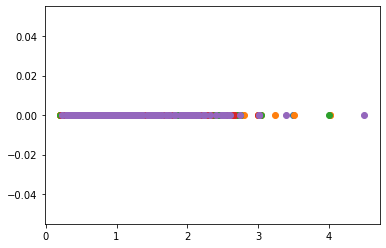

In [178]:
# make sub different dataframe for based on cut
unique_cut = df.cut.unique()
df_subCut = {}
for i in unique_cut:
  df_subCut[i] = df.loc[df['cut'] == i ]
for i in unique_cut:
  plt.plot(df_subCut[i]['carat'],np.zeros_like(df_subCut[i]['carat']),'o')
plt.show()

In [179]:
df.color.unique()

array([1, 3, 2, 0, 4, 6, 5])

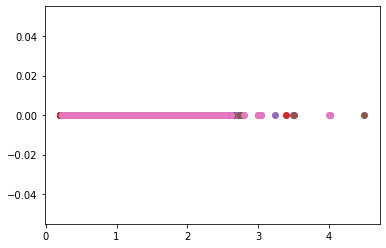

In [180]:
unique_color = df.color.unique()
df_subColor = {}
for i in unique_color:
  df_subColor[i] = df.loc[df['color'] == i ]
for i in unique_color:
  plt.plot(df_subColor[i]['carat'],np.zeros_like(df_subColor[i]['carat']),'o')
plt.show()

In [181]:
df.clarity.unique()

array([2, 1, 7, 4, 6, 5, 3, 0])

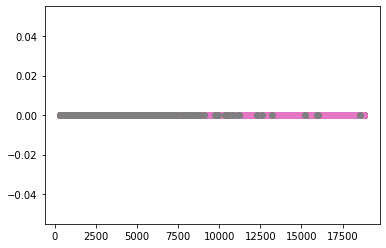

In [182]:
unique_clarity = df.clarity.unique()
df_subclarity= {}
for i in unique_clarity:
  df_subclarity[i] = df.loc[df['clarity'] == i ]
for i in unique_clarity:
  plt.plot(df_subclarity[i]['price'],np.zeros_like(df_subclarity[i]['price']),'o')
plt.show()

#**Observation** 
we observed that we can not identify the price of any diamonds based on its carrat and color only, clarity plays a role but not that much.

# **Multivariate Analysis**

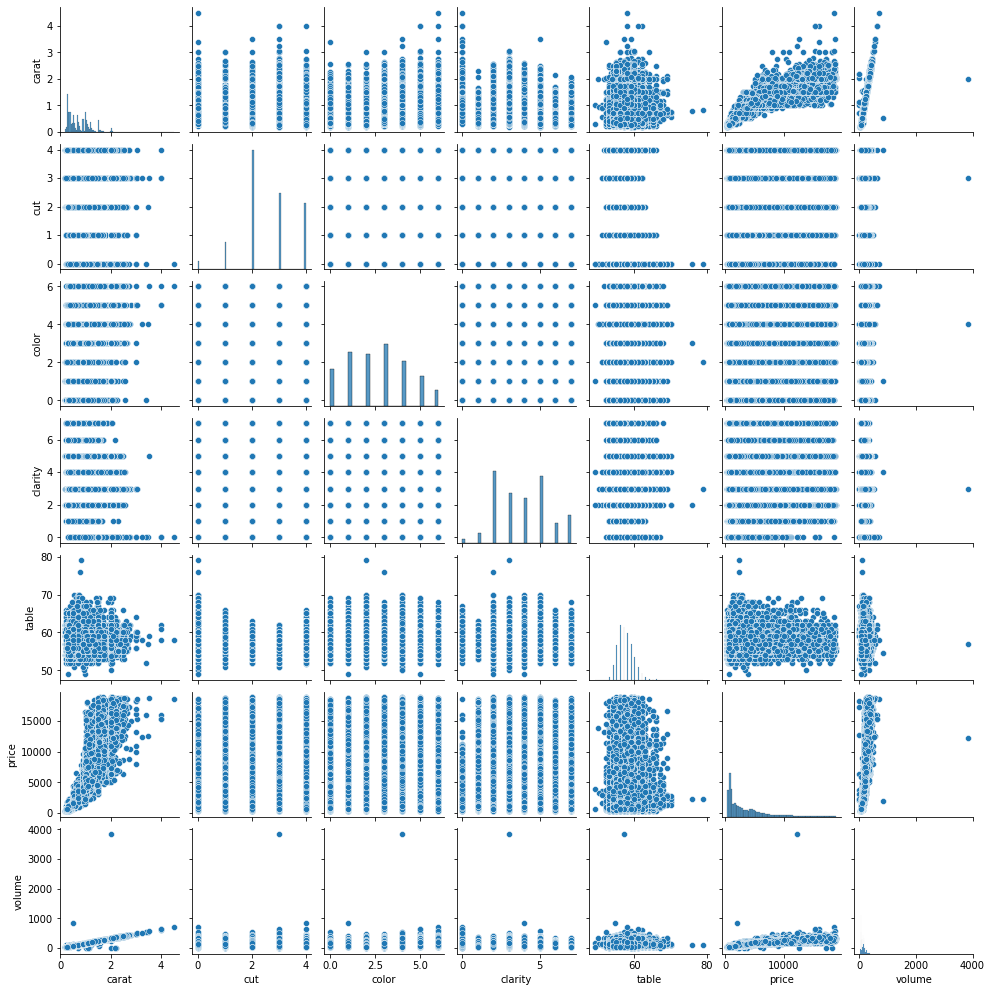

In [183]:
df2 = df.drop(['x', 'y', 'z','depth'], axis = 1)
df2['volume'] = df['x']*df['y']*df['z']

def decode(df,variable):
  df2[variable] = e.inverse_transform(df2[variable])
  
for i in c_f:
  decode(df,i)

sns.pairplot(df2,height=2)

# **Observations**


*   Carat increase as volume increases
*   price of carat less than 1.5 increases as carat increases



In [184]:
df2.head()

,carat,cut,color,clarity,table,price,volume
0,0.30,2,1,2,58.0,499,48.726678
1,0.33,3,3,1,58.0,984,53.225640
2,0.90,4,1,7,60.0,6289,139.726944
3,0.42,2,2,4,56.0,1082,68.482560
4,0.31,2,2,6,59.0,779,51.066825
